In [1]:
import plotly.graph_objects as go
import base64
import pandas as pd

In [2]:
df = pd.read_csv("Source_data.csv", sep=";")
df["Organ"] = df["Organ"].str.strip()
df["Overexpression"] = df["Overexpression"].str.replace(",", ".")
df.tail()

Gene            Organ Overexpression  \
28  ERBB2     Colon cancer              5   
29  ERBB2   Bladder cancer           12.4   
30  ERBB2   Ovarian cancer             27   
31  ERBB2  Prostate cancer             10   
32  ERBB2  Cervical cancer             21   

                                       Source  
28  https://doi.org/10.1038/s41571-019-0268-3  
29  https://doi.org/10.1038/s41571-019-0268-3  
30  https://doi.org/10.1038/s41571-019-0268-3  
31  https://doi.org/10.1038/s41571-019-0268-3  
32  https://doi.org/10.1038/s41571-019-0268-3

{'Head and neck cancer': '90-95', 'Thyroid cancer': '-', 'Lung cancer': '50-90', 'Gastric cancer': '27-64', 'Breast cancer': '27-90', 'Pancreatic cancer': '65-95', 'Colon cancer': '50', 'Bladder cancer': '70', 'Ovarian cancer': '30-70', 'Prostate cancer': '40-100', 'Cervical cancer': '54'}


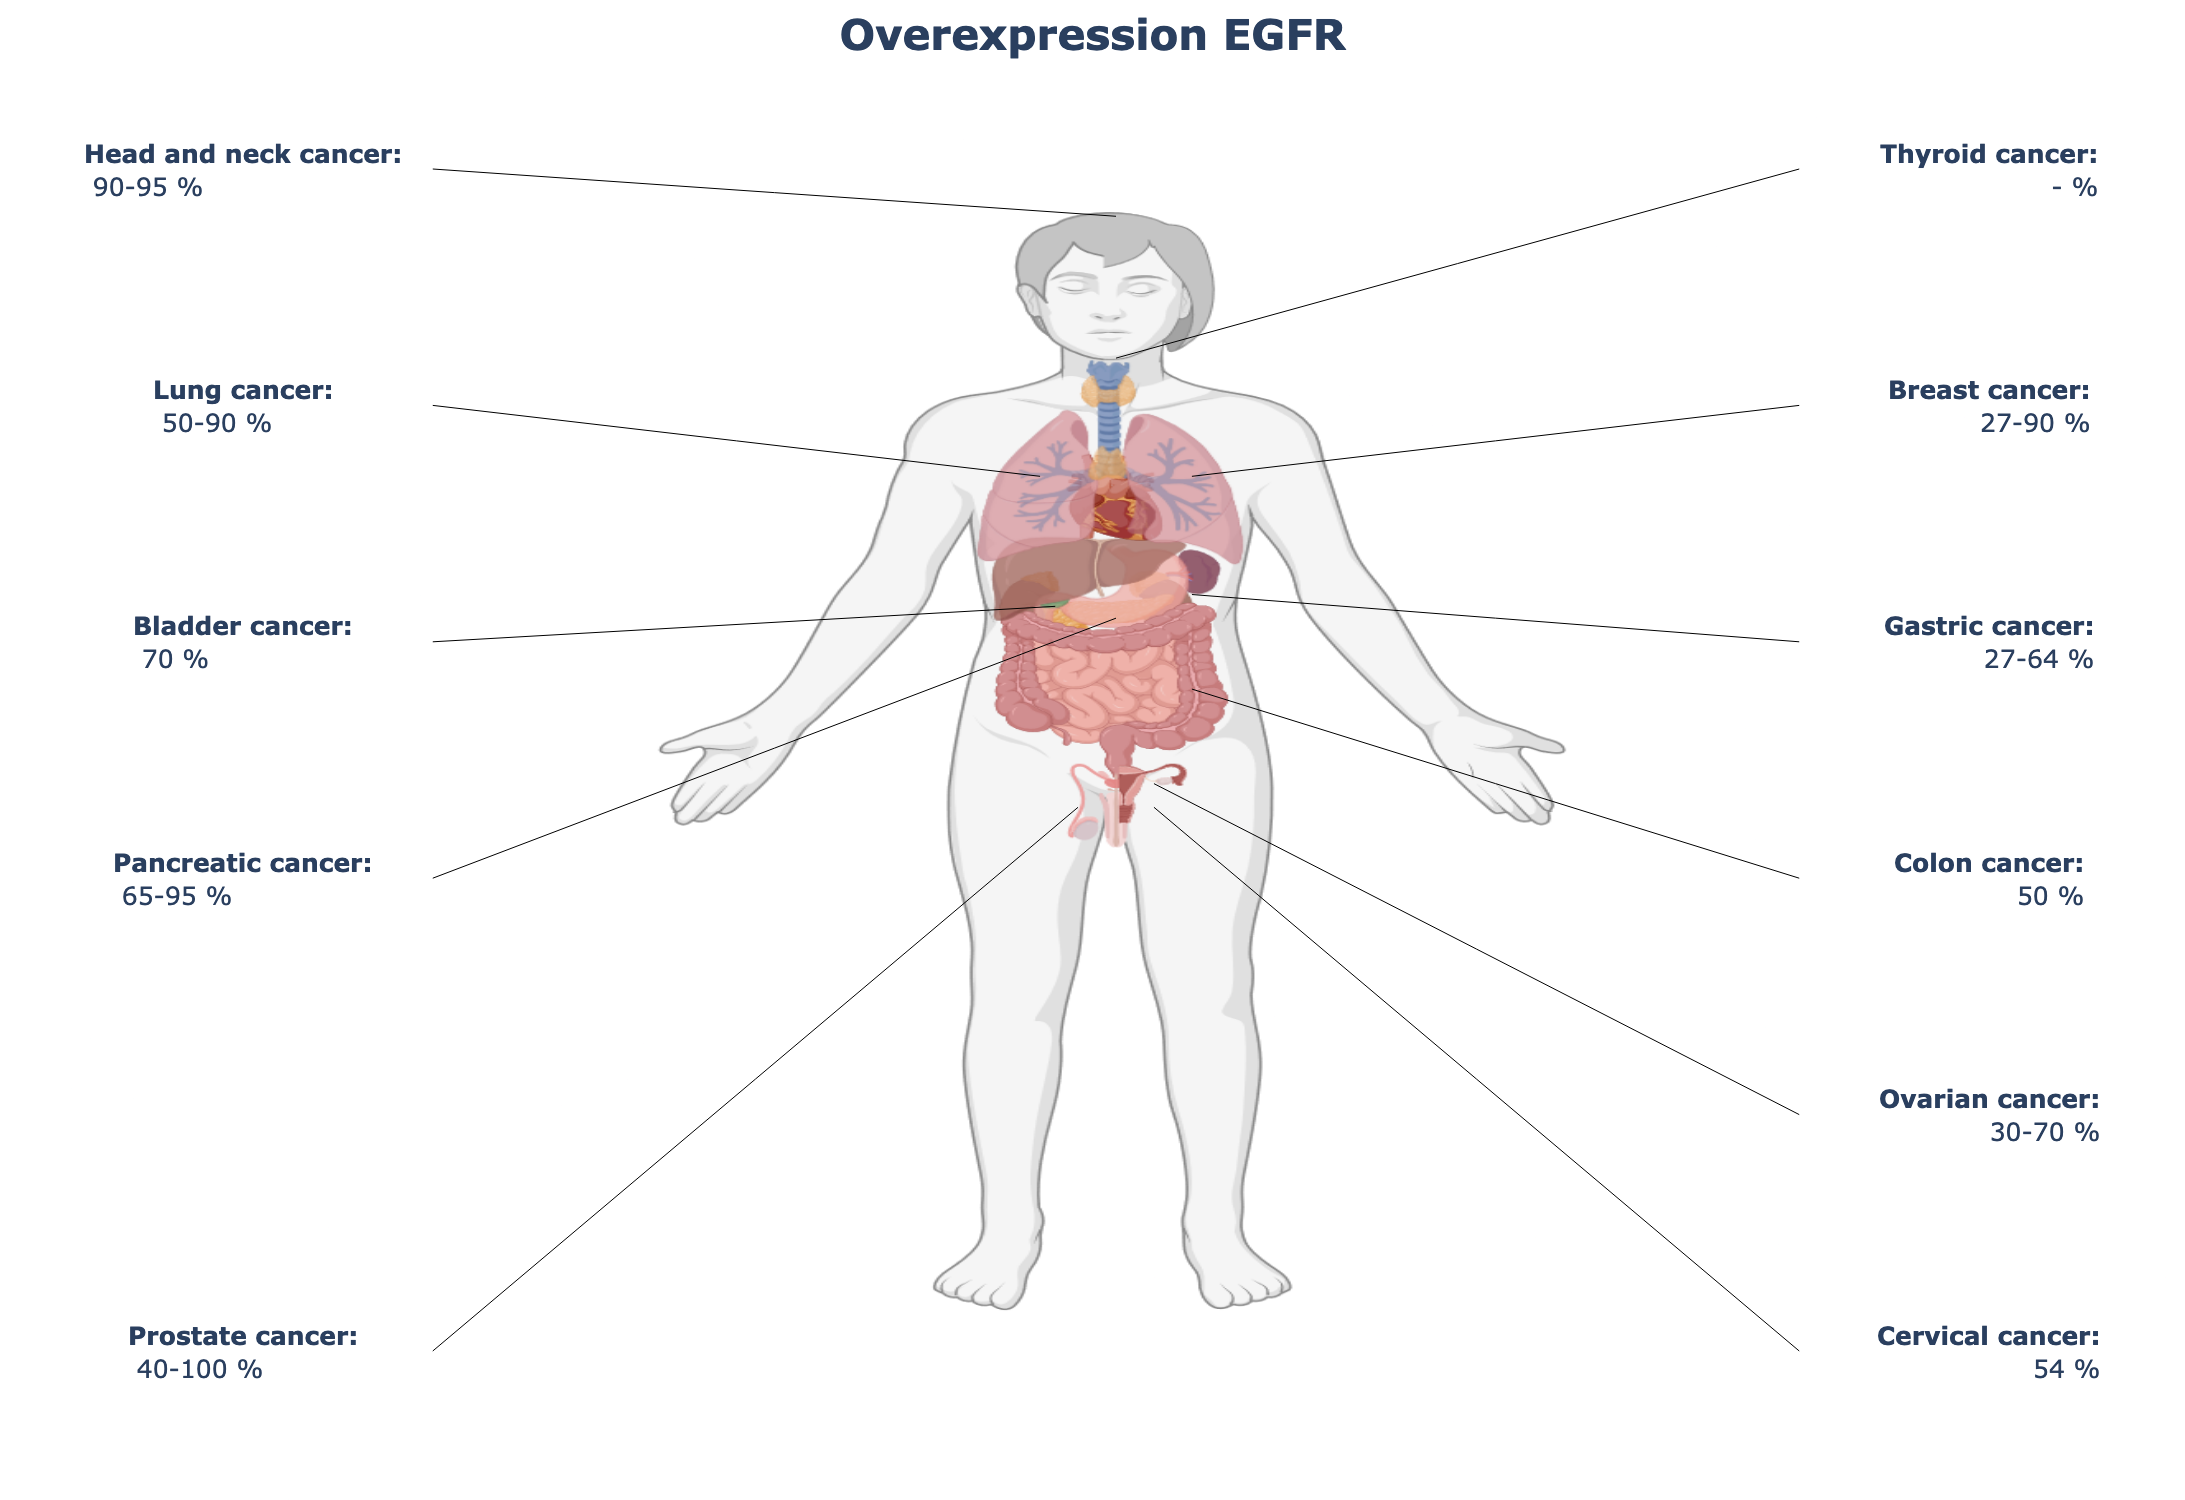

{'Head and neck cancer': '17-44', 'Thyroid cancer': '44', 'Lung cancer': '2.5', 'Gastric cancer': '20', 'Breast cancer': '15-20', 'Pancreatic cancer': '26', 'Colon cancer': '5', 'Bladder cancer': '12.4', 'Ovarian cancer': '27', 'Prostate cancer': '10', 'Cervical cancer': '21'}


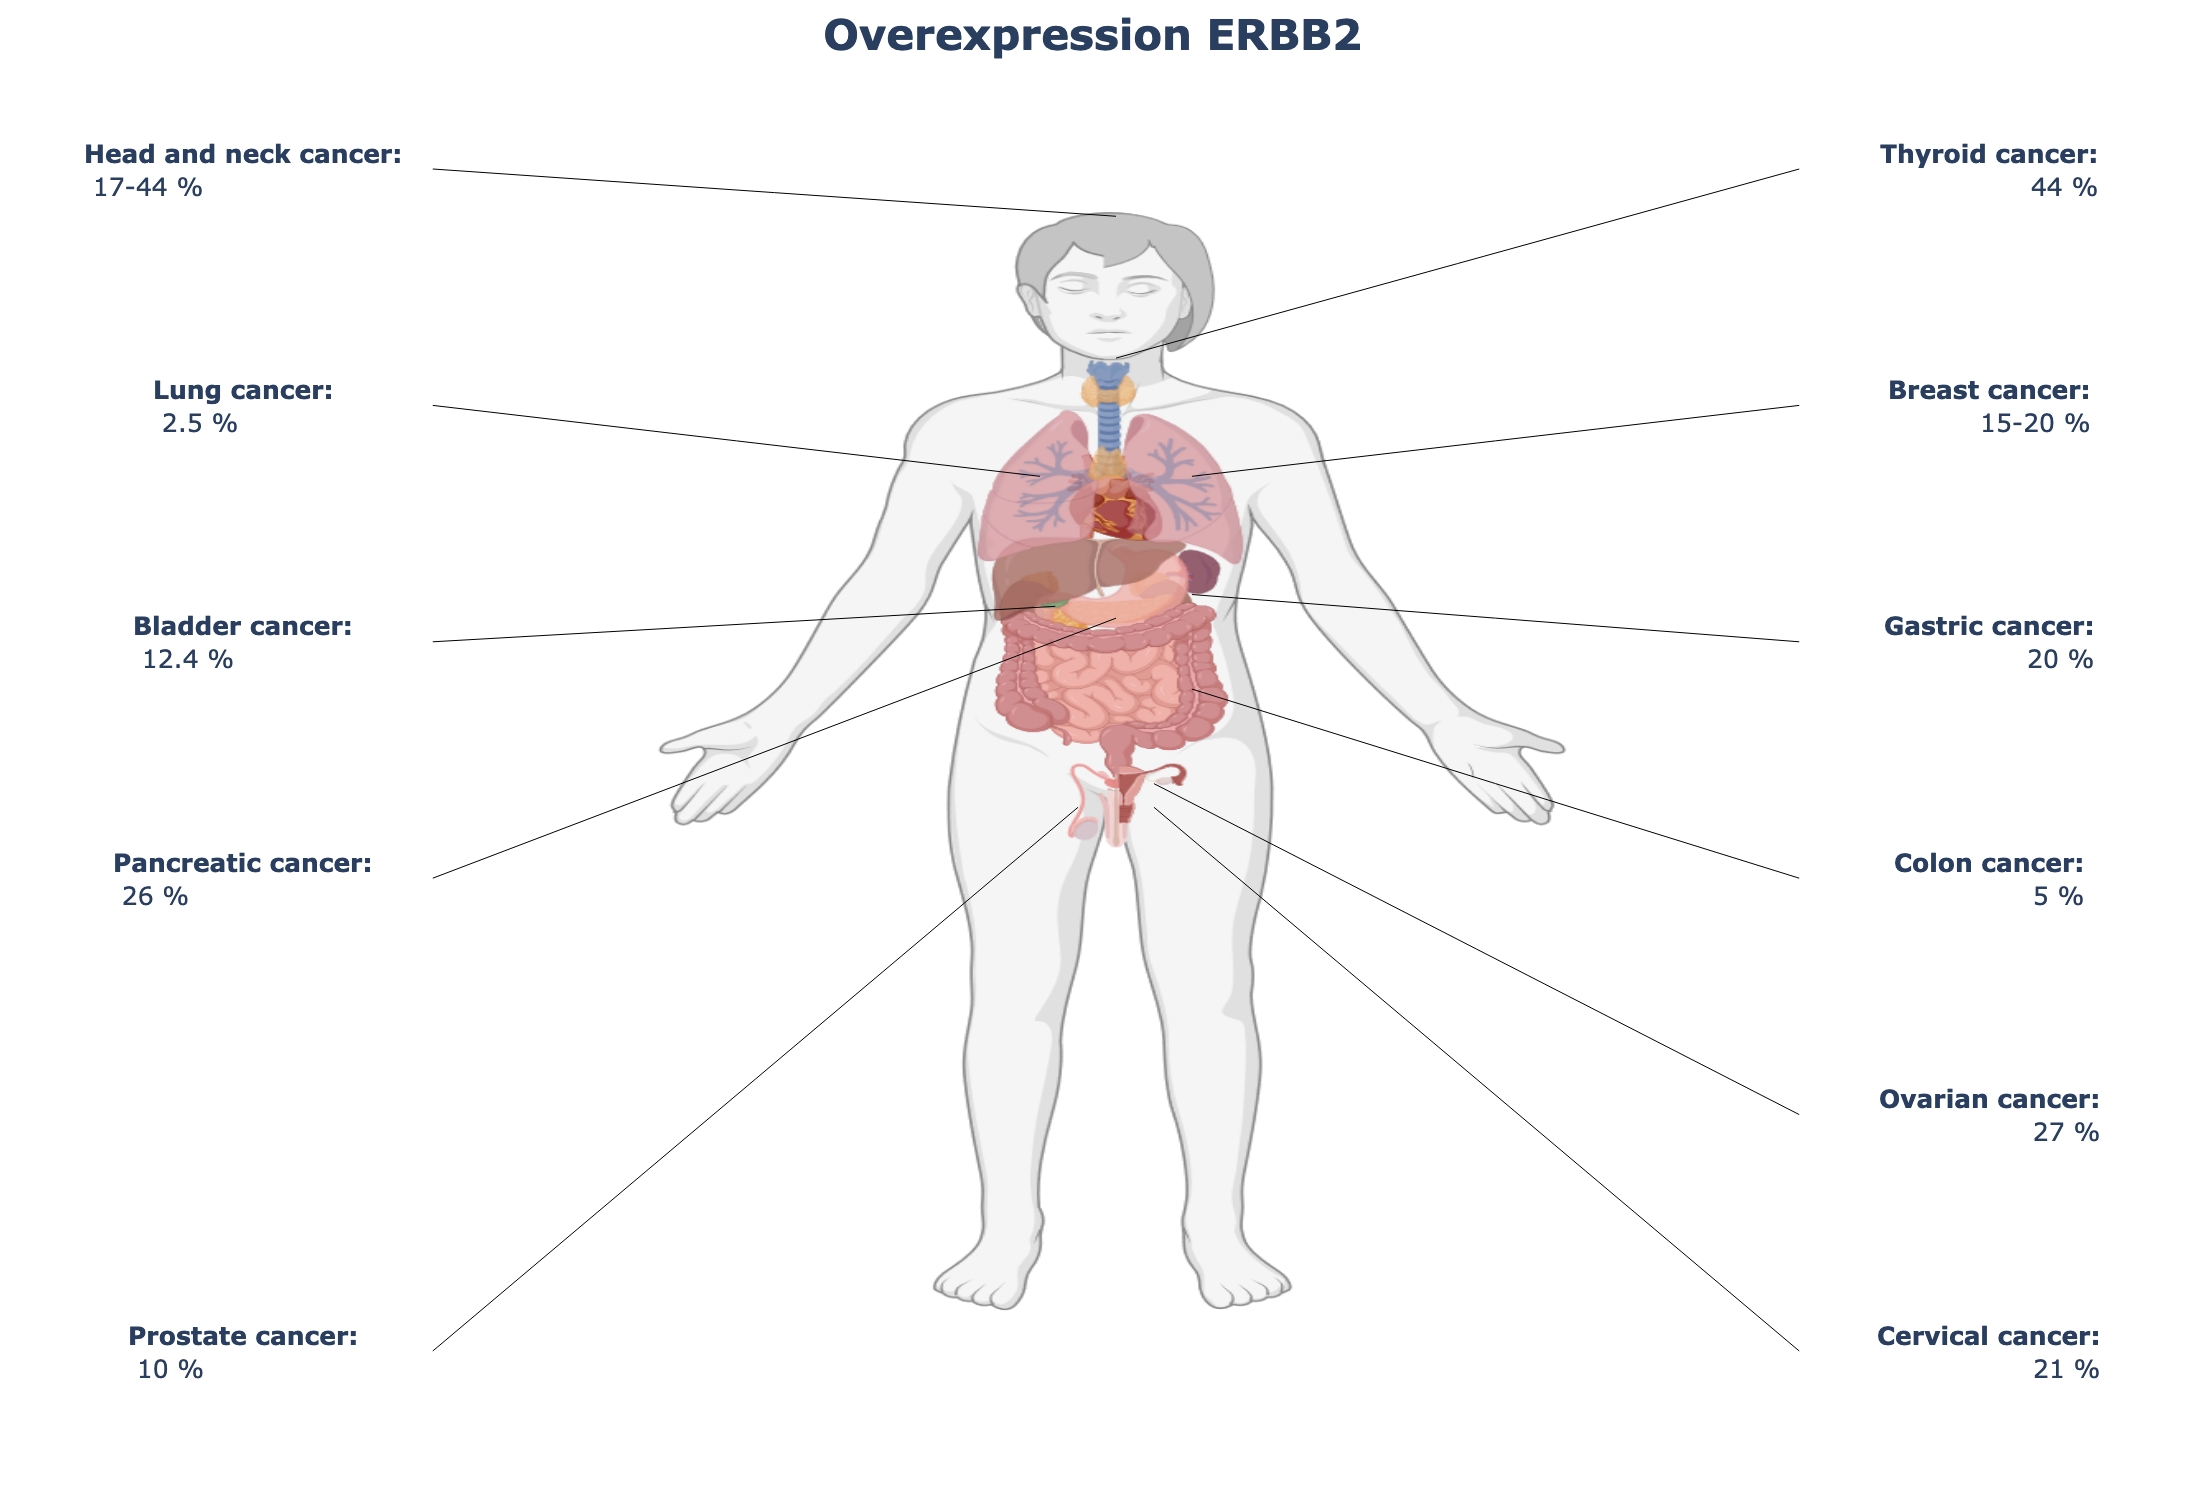

{'Head and neck cancer': '62.57', 'Thyroid cancer': '82.5', 'Lung cancer': '64-75', 'Gastric cancer': '66.3', 'Breast cancer': '62.4', 'Pancreatic cancer': '55', 'Colon cancer': '68.4', 'Bladder cancer': '56', 'Ovarian cancer': '47', 'Prostate cancer': '71', 'Cervical cancer': '88.7'}


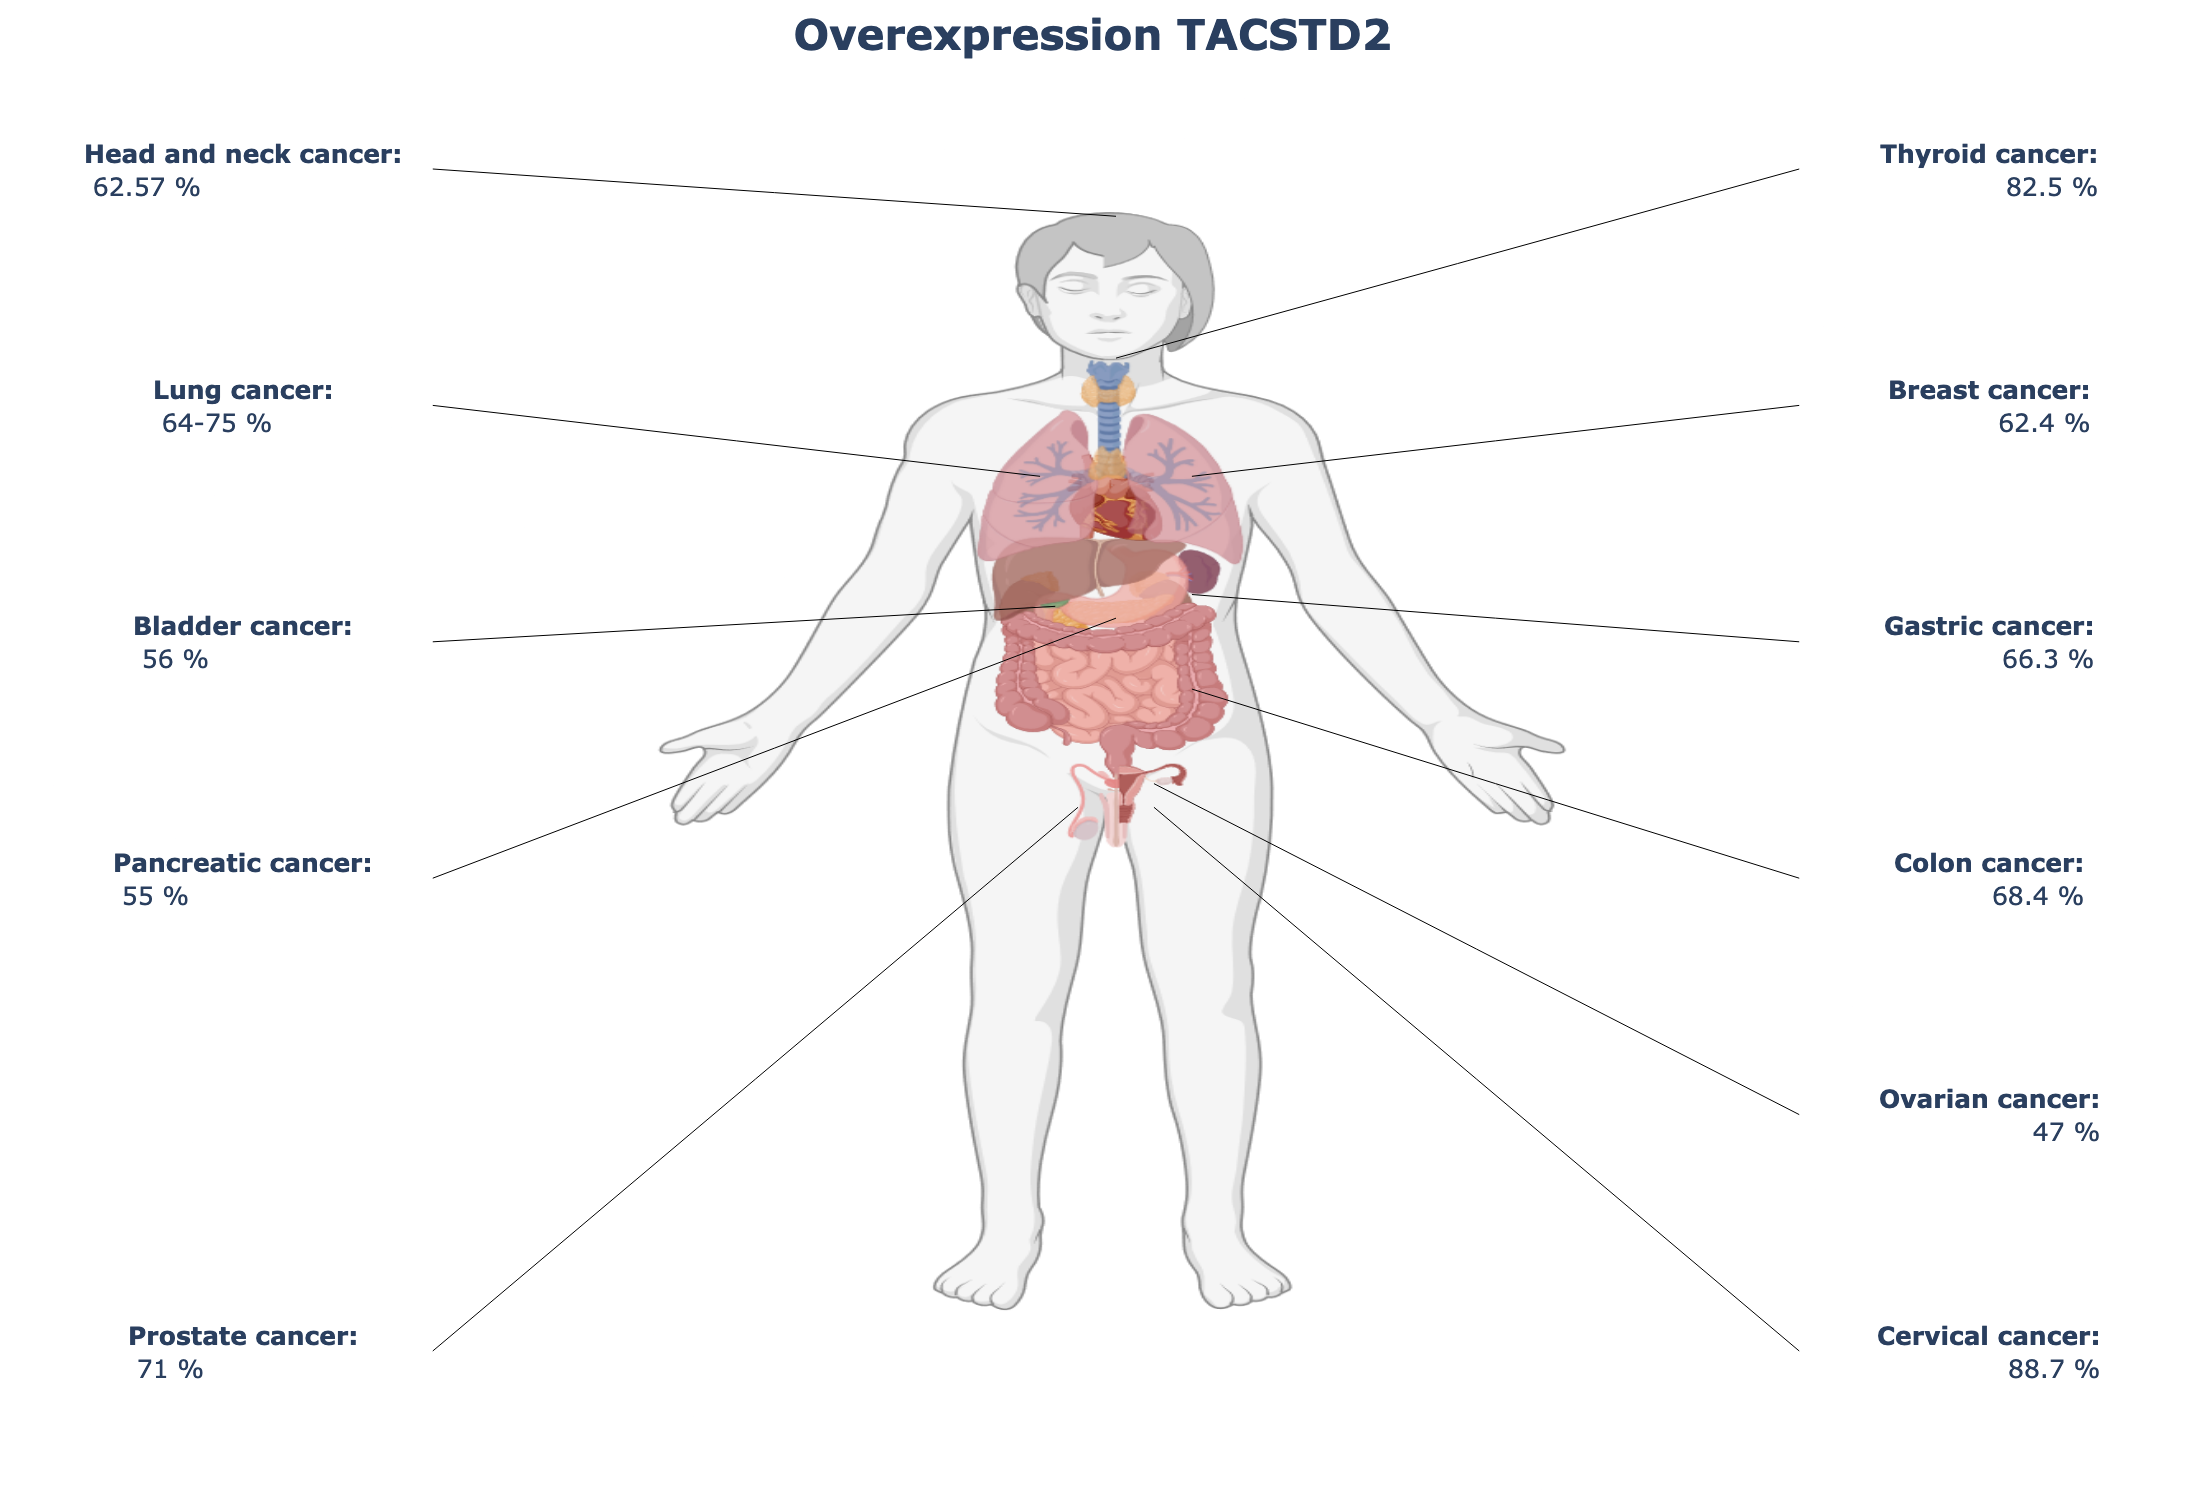

In [3]:
gene = "Trop2"

genes = set(df["Gene"])

# Define the body parts and their coordinates
body_parts = {
    'Head and neck cancer': (-0.9, 0, 0, -0.2),
    'Thyroid cancer': (0.9, 0, 0, -0.8),
    'Lung cancer': (-0.9, -1, -0.1, -1.3),
    'Gastric cancer': (0.9, -2, 0.1, -1.8),
    'Breast cancer': (0.9, -1, 0.1, -1.3),
    'Pancreatic cancer': (-0.9, -3, 0, -1.9),
    'Colon cancer': (0.9, -3, 0.1, -2.2),
    'Bladder cancer': (-0.9, -2, -0.08, -1.85),
    'Ovarian cancer': (0.9, -4, 0.05, -2.6),
    'Prostate cancer': (-0.9, -5, -0.05, -2.7),
    'Cervical cancer': (0.9, -5, 0.05, -2.7)
}

with open('body.png', 'rb') as f:
    bg_image = f.read()


for gene in genes:
    fig = go.Figure()

    
    sub_df = df[df.Gene == gene]
    expression_values = sub_df[["Organ", "Overexpression"]].set_index("Organ").to_dict()["Overexpression"]
    print(expression_values)

    # Add body parts as scatter points and annotations
    for part, coord in body_parts.items():
        x, y, _, _ = coord
        fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(size=0, color='white', line=dict(width=0, color='black')),
                                 text=[part], name=part))
        if part in expression_values:
            text = f'<b>{part}:</b><br> {expression_values[part]} %'
            align = 'left' if x < 0 else 'right'
            x_offset = -0.25 if align == 'left' else 0.25
            fig.add_annotation(x=x + x_offset, y=y, text=text, showarrow=False, font=dict(size=25), align=align)
    
    for part, coord in body_parts.items():
        x1, y1, x2, y2 = coord
        fig.add_trace(go.Scatter(x=[x1, x2], y=[y1, y2], mode='lines', line=dict(color='black', width=1), showlegend=False))
    
    # Update layout with background image
    fig.update_layout(title=f'<b>Overexpression {gene}</b>', showlegend=False, font=dict(size=30), title_x=0.5,
                      xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                      yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                      width=1500, height=1500,
                      images=[go.layout.Image(
                          x=-1.25,
                          sizex=2.5,
                          y=0,
                          sizey=5,
                          xref="x",
                          yref="y",
                          opacity=1.0,
                          layer="below",
                          sizing="stretch",
                          source='data:image/png;base64,' + str(base64.b64encode(bg_image), 'utf-8')
                      )])
    
    fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
    
    fig.show()
    fig.write_image(f"{gene}_overexpression.png")
    